In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
cash = pd.read_csv('./project_dataset/extract - cash request - data analyst.csv')
fees = pd.read_csv('./project_dataset/extract - fees - data analyst - .csv')
cash.head(10)

In [ ]:
# Convert 'created_at' to datetime
cash['created_at'] = pd.to_datetime(cash['created_at'])

# Create month and cohorte column
cash.sort_values(by='user_id', inplace=True)
cash['month'] = cash['created_at'].dt.to_period('M')
cash['cohortes'] = cash.groupby('user_id')['month'].transform('min')
cash[['cohortes', 'month', 'user_id']].head(10)

In [ ]:
table = cash.groupby('cohortes').agg(clientes = ('user_id', 'nunique'))
table

In [ ]:
table_month = cash.groupby(['cohortes', 'month']).agg(clientes = ('user_id', 'nunique')).reset_index()
table_month

In [ ]:
pivot_unitial = table_month.groupby('cohortes').first()
pivot_unitial

In [ ]:
retention = table_month.pivot(index='cohortes', columns='month', values='clientes').div(pivot_unitial['clientes'], axis=0)
retention

In [ ]:
sns.heatmap(retention)

In [ ]:
# Take the first operations of each client
first_operations = user_operation.drop_duplicates(subset='user_id')
first_operations['month_creation'] = first_operations['created_at'].dt.to_period('M')
first_operations.groupby('month_creation')['user_id']
first_operations = pd.DataFrame(first_operations)
first_operations[['user_id','month_creation']].head(25).sort_values(by='month_creation')

In [ ]:
cohortes = first_operations[['user_id','month_creation']].sort_values(by='user_id')
cohortes.reset_index(drop=True, inplace=True)
cohortes

In [ ]:
cash['month_creation'] = cash['created_at'].dt.to_period('M')
cohortes_first = cash.groupby('month_creation')['user_id'].count()
cohortes_first_rejected = cash[cash['status'] == 'rejected'].groupby('month_creation')['user_id'].count()
cohortes_first.plot(kind='bar', color='blue', label='Accepted')
cohortes_first_rejected.plot(kind='bar', color='red', label='Rejected')
plt.xlabel('Cohortes')
plt.legend()
plt.show()
print(f'Acepted: {100 - cohortes_first_rejected / cohortes_first * 100}')

In [ ]:
deleted_account = cash.groupby('deleted_account_id')['id'].count()
deleted_account_list = list(pd.DataFrame(deleted_account).reset_index()['deleted_account_id'])

In [ ]:
cash_status = cash.groupby('status')['user_id'].count()
cash_status.plot(kind='pie', autopct='%1.1f%%')

In [ ]:
# Creation a column of converting 'created_at' date as month
cash['month'] = cash['created_at'].dt.to_period('M')

In [ ]:
cash[['user_id', 'month', 'month_creation']]

In [ ]:
pivot = cash.pivot_table(values='month_creation', index='month', aggfunc='count')
pivot

<Axes: title={'center': 'Monthly cash request status percentage'}, xlabel='Month - Year', ylabel='Percent (%)'>

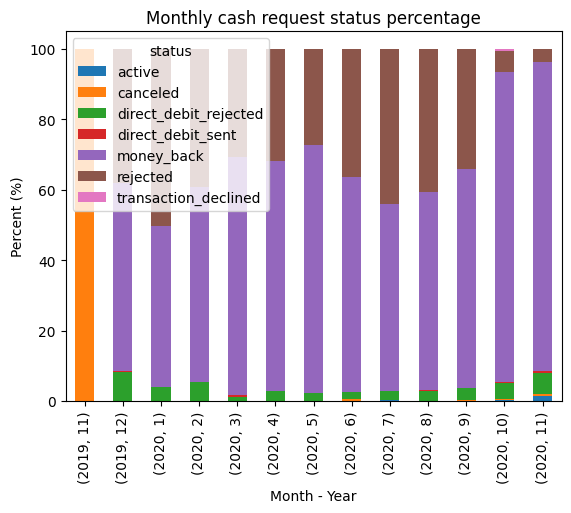

In [43]:
# Percent of cash requests grouped by date and status

status_cash = cash.copy()

status_cash["month"] = status_cash["created_at"].dt.month
status_cash["year"] = status_cash["created_at"].dt.year

gb = status_cash.groupby(["year", "month", "status"]).size().unstack(fill_value=0)

gb = gb.div(gb.sum(axis=1), axis=0) * 100

gb.plot(kind="bar", stacked=True, xlabel="Month - Year", ylabel="Percent (%)", title="Monthly cash request status percentage")

<Axes: title={'center': 'Monthly cash request status (binary) percentage comparison'}, xlabel='Month - Year', ylabel='Percent (%)'>

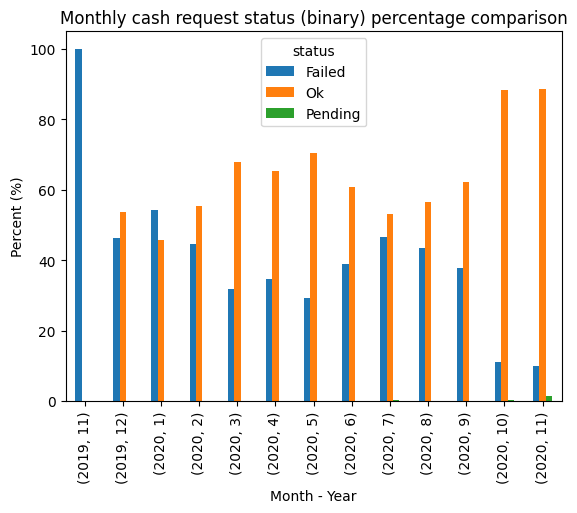

In [42]:
# Percent of cash requests grouped by date and status (status have been reduced to a binary state)

status_cash = cash.copy()

status_cash["month"] = status_cash["created_at"].dt.month
status_cash["year"] = status_cash["created_at"].dt.year
status_cash["status"] = status_cash["status"].map({
    "active": "Pending",
    "canceled": "Failed",
    "direct_debit_rejected": "Failed",
    "direct_debit_sent": "Ok",
    "money_back": "Ok",
    "rejected": "Failed",
    "transaction_declined": "Failed"
})

gb = status_cash.groupby(["year", "month", "status"]).size().unstack(fill_value=0)

gb = gb.div(gb.sum(axis=1), axis=0) * 100

gb.plot(kind="bar", stacked=False, xlabel="Month - Year", ylabel="Percent (%)", title="Monthly cash request status (binary) percentage comparison")